In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline

In [14]:
df=pd.read_csv('../../../Data/DataKDE.csv')

Not overly happy with the column names in the csv file, so let's see if we can change them :
into ' Volatility ' and 'FCF2Debt '

In [15]:
df.columns=['Name', 'Volatility', 'CF2Debt', 'DefaultRisk']
df.columns

Index(['Name', 'Volatility', 'CF2Debt', 'DefaultRisk'], dtype='object')

We use the groupby() function of Pandas to have some average position of the storm

In [16]:
dfs=df.groupby('DefaultRisk')

In [17]:
#The grouped dataframe has the following properties 
AvgLevels=dfs[['Volatility','CF2Debt']].mean()
AvgLevels

,Volatility,CF2Debt
DefaultRisk,,
High,30.477500,0.075000
Low,23.226425,1.435894


<b>First Observation:</b><br>High Realized Equity Volatility and Low Free Cashflow is associated with High Default Risk

In [18]:
#Creating two dataFrames from the original dataframe df
df_HDefRisk=df[(df.DefaultRisk == 'High')]
df_LDefRisk=df[(df.DefaultRisk == 'Low')]
print(type(df_HDefRisk))
print(("The average realized equity volatility of Low Default is : {k: 0.02f}").format(k=df_LDefRisk['Volatility'].mean()))
print("(This result matches what we found when earlier grouping the dataframe)")

<class 'pandas.core.frame.DataFrame'>
The average realized equity volatility of Low Default is :  23.23
(This result matches what we found when earlier grouping the dataframe)


Text(0, 0.5, 'CashFlow / Debt')

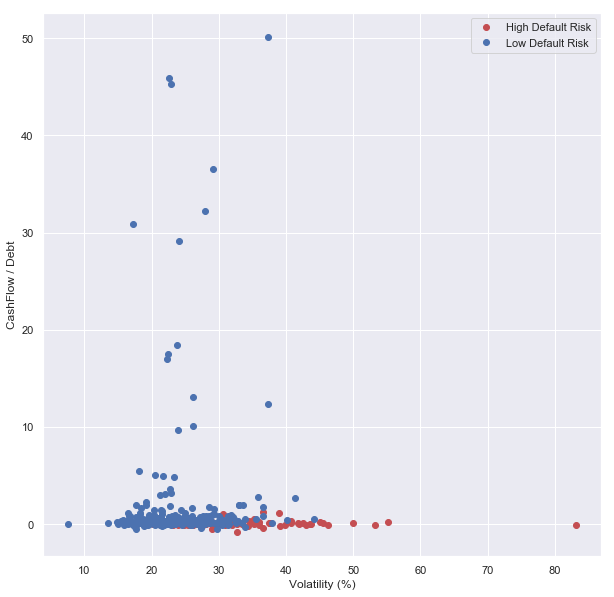

In [19]:
plt.figure(figsize=(10,10) )
plt.plot(df_HDefRisk.Volatility,df_HDefRisk.CF2Debt,'or',label='High Default Risk')
plt.plot(df_LDefRisk.Volatility,df_LDefRisk.CF2Debt,'ob',label='Low Default Risk')
plt.legend()
plt.xlabel('Volatility (%)')
plt.ylabel('CashFlow / Debt')

The Multivariate kernel density estimator from the <b>statsmodels </b> package is going to be used. 
We can find more info on the model using the "?" in front of the function

In [20]:
KDE_HighDefaultRisk=sm.nonparametric.KDEMultivariate(data=[df_HDefRisk.Volatility,df_HDefRisk.CF2Debt],var_type='cc')
KDE_LowDefaultRisk=sm.nonparametric.KDEMultivariate(data=[df_LDefRisk.Volatility,df_LDefRisk.CF2Debt],var_type='cc')

In [21]:
#low free cashflow is creating high default risk
print(KDE_LowDefaultRisk.pdf([20,1]))
print(KDE_HighDefaultRisk.pdf([20,1]))
print(KDE_HighDefaultRisk.bw)
print(KDE_LowDefaultRisk.bw)

0.013090641803160831
0.000107063991959003
[4.0105288  0.10812561]
[1.92194748 2.2855728 ]


<h3> Use the seaborn visualization package </h3> <br>
This comes with a 2D KDE calculation 

(0, 50)

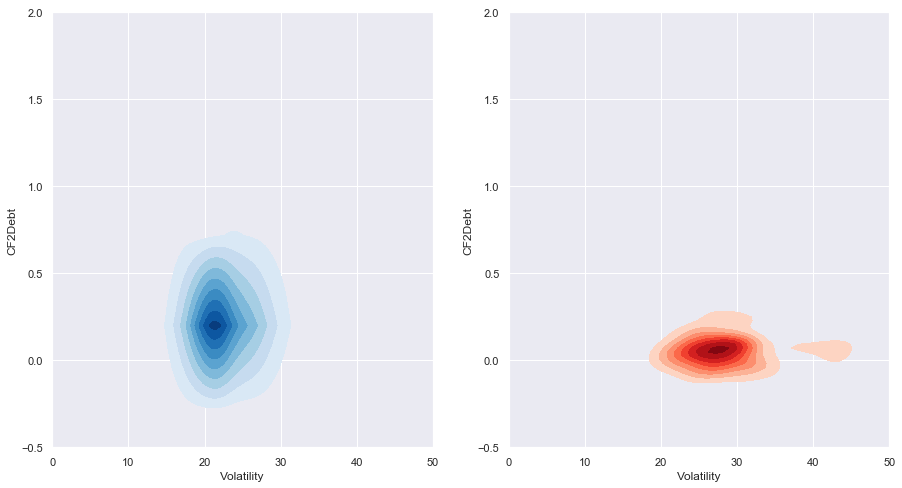

In [22]:

f, ax = plt.subplots(1,2,figsize=(15,8))
sns.kdeplot(df_HDefRisk.Volatility,df_HDefRisk.CF2Debt,
                 cmap="Reds", shade=True, shade_lowest=False,ax=ax[1])

sns.kdeplot(df_LDefRisk.Volatility,df_LDefRisk.CF2Debt,
                 cmap="Blues", shade=True, shade_lowest=False,ax=ax[0])
ax[0].set_ylim(-0.5,2)
ax[1].set_ylim(-0.5,2)
ax[0].set_xlim(0,50)
ax[1].set_xlim(0,50)